In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

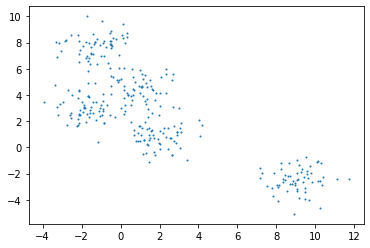

In [14]:
from sklearn.datasets import make_blobs
X,y_true = make_blobs(n_samples=300,centers=5,cluster_std=0.9,random_state=0)
plt.scatter(X[:,0],X[:,1],s=1)

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

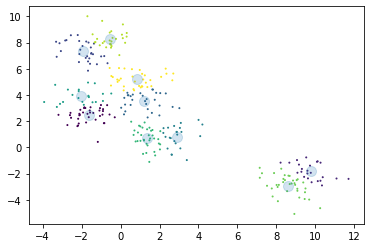

In [16]:
plt.scatter(X[:,0],X[:,1],c=y_kmeans,s=1)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,alpha=0.2)

In [17]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,12):
    kmeans = KMeans(n_clusters=n_clusters)
    y_kmeans = kmeans.fit_predict(X)
    print("K=",n_clusters, ' : ', silhouette_score(X,y_kmeans))

K= 2  :  0.6680020374496579
K= 3  :  0.5181693271051288
K= 4  :  0.5414177019961424
K= 5  :  0.5953159362124683
K= 6  :  0.5501473977273387
K= 7  :  0.5155638579607478
K= 8  :  0.4225208267859411
K= 9  :  0.3591876817860328
K= 10  :  0.3803557112800072
K= 11  :  0.35166183761521563


# Clustering customers

In [18]:
import pandas as pd
data = pd.read_csv('customers.csv')
data.drop(['Region','Channel'],axis=1,inplace=True)

In [19]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


(array([50., 28., 41., 19., 26., 23., 22., 21., 21., 16., 20., 12., 10.,
        11.,  9., 13., 12.,  8.,  8.,  6.,  5.,  3.,  6.,  5.,  5.,  1.,
         5.,  4.,  3.,  1.,  1.,  0.,  4.,  1.,  2.,  2.,  1.,  1.,  3.,
         1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  3.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([3.0000000e+00, 1.1244800e+03, 2.2459600e+03, 3.3674400e+03,
        4.4889200e+03, 5.6104000e+03, 6.7318800e+03, 7.8533600e+03,
        8.9748400e+03, 1.0096320e+04, 1.1217800e+04, 1.2339280e+04,
        1.3460760e+04, 1.4582240e+04, 1.5703720e+04, 1.6825200e+04,
        1.7946680e+04, 1.9068160e+04, 2.0189640e+04, 2.1311120e+04,
        2.2432600e+04, 2.3554080e+04, 2.4675560e+04, 2.5797040e+04,
        2.6918520e+04, 2.8

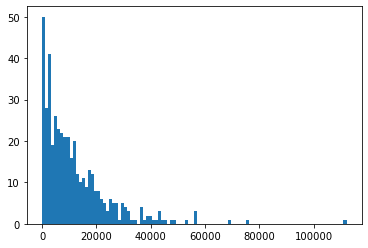

In [21]:
plt.hist(data.Fresh,100)

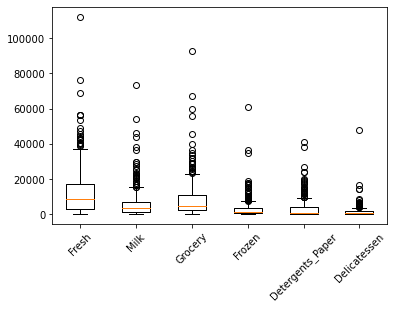

In [22]:
plt.boxplot([data['Fresh'],data['Milk'],data['Grocery'],data['Frozen'],data['Detergents_Paper'],data['Delicatessen']])
plt.xticks(range(1,7),data.columns,rotation=45)
plt.show()

array([[<AxesSubplot:xlabel='Fresh', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Milk', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Delicatessen', ylabel='Fresh'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Milk'>,
        <AxesSubplot:xlabel='Milk', ylabel='Milk'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Milk'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Milk'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>,
        <AxesSubplot:xlabel='Delicatessen', ylabel='Milk'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Milk', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>,
        <AxesSubplot:xl

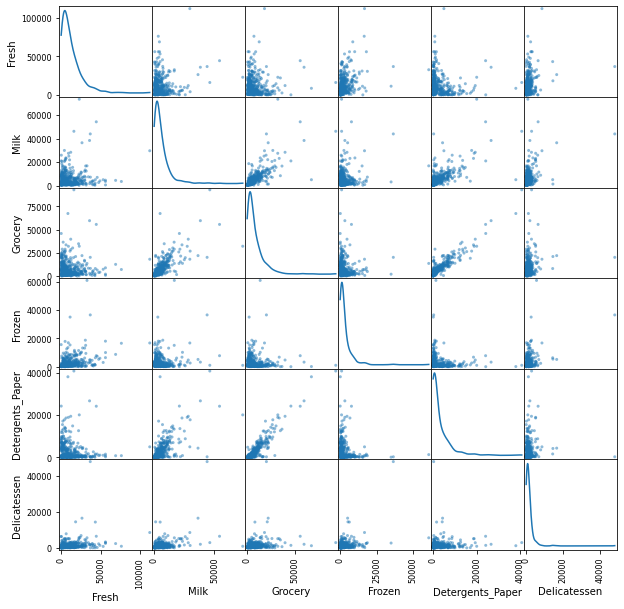

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(10,10),diagonal='kde')

In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
feature='Grocery'
X_train,X_test,y_train,y_test = train_test_split(data.drop(feature,axis=1),
                                                data[feature])
regressor = DecisionTreeRegressor()
regressor.fit(X_train,y_train)
pred_test=regressor.predict(X_test)
r2_score(y_test,pred_test)

0.6805828915696901

In [26]:
log_data = np.log(data)

array([[<AxesSubplot:xlabel='Fresh', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Milk', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Fresh'>,
        <AxesSubplot:xlabel='Delicatessen', ylabel='Fresh'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Milk'>,
        <AxesSubplot:xlabel='Milk', ylabel='Milk'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Milk'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Milk'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>,
        <AxesSubplot:xlabel='Delicatessen', ylabel='Milk'>],
       [<AxesSubplot:xlabel='Fresh', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Milk', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Grocery', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Frozen', ylabel='Grocery'>,
        <AxesSubplot:xlabel='Detergents_Paper', ylabel='Grocery'>,
        <AxesSubplot:xl

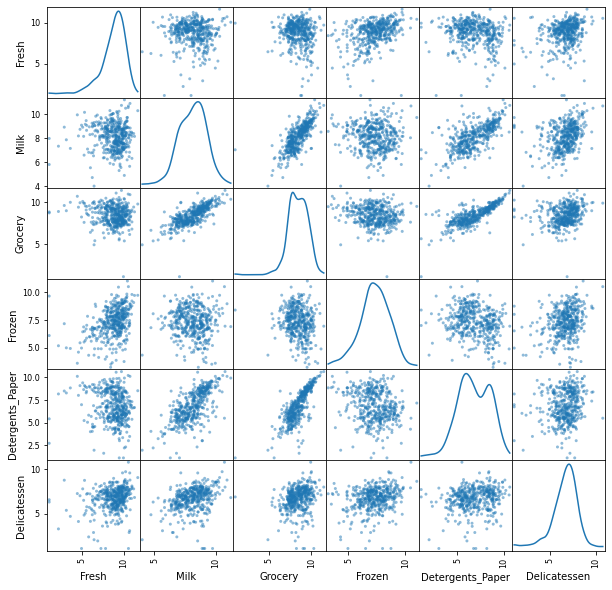

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(log_data,figsize=(10,10),diagonal='kde')

In [58]:
all_outliers = np.array([],dtype='int64')
for feature in log_data.keys():
    Q1 = np.percentile(log_data[feature],25)
    Q3 = np.percentile(log_data[feature],75)
    step = 1.5*(Q3-Q1)
    print("Outliers of feature ",feature)
    outlier_pts = log_data[~((log_data[feature]>=Q1-step) & (log_data[feature] <=Q3+step))]
    all_outliers = np.append(all_outliers,outlier_pts.index.values.astype('int64'))
    print(outlier_pts)
    

Outliers of feature  Fresh
        Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.442651   9.950323  10.732651  3.583519         10.095388      7.260523
66   2.197225   7.335634   8.911530  5.164786          8.151333      3.295837
81   5.389072   9.163249   9.575192  5.645447          8.964184      5.049856
95   1.098612   7.979339   8.740657  6.086775          5.407172      6.563856
96   3.135494   7.869402   9.001839  4.976734          8.262043      5.379897
128  4.941642   9.087834   8.248791  4.955827          6.967909      1.098612
171  5.298317  10.160530   9.894245  6.478510          9.079434      8.740337
193  5.192957   8.156223   9.917982  6.865891          8.633731      6.501290
218  2.890372   8.923191   9.629380  7.158514          8.475746      8.759669
304  5.081404   8.917311  10.117510  6.424869          9.374413      7.787382
305  5.493061   9.468001   9.088399  6.683361          8.271037      5.351858
338  1.098612   5.808142   8.856661  

In [59]:
all_outliers

array([ 65,  66,  81,  95,  96, 128, 171, 193, 218, 304, 305, 338, 353,
       355, 357, 412,  86,  98, 154, 356,  75, 154,  38,  57,  65, 145,
       175, 264, 325, 420, 429, 439,  75, 161,  66, 109, 128, 137, 142,
       154, 183, 184, 187, 203, 233, 285, 289, 343], dtype=int64)

In [60]:
len(all_outliers)

48

In [61]:
 log_data.keys()

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper',
       'Delicatessen'],
      dtype='object')

In [62]:
uniq_all_outliers,indices = np.unique(all_outliers,return_inverse=True)

In [63]:
uniq_all_outliers

array([ 38,  57,  65,  66,  75,  81,  86,  95,  96,  98, 109, 128, 137,
       142, 145, 154, 161, 171, 175, 183, 184, 187, 193, 203, 218, 233,
       264, 285, 289, 304, 305, 325, 338, 343, 353, 355, 356, 357, 412,
       420, 429, 439], dtype=int64)

In [64]:
len(uniq_all_outliers)

42

In [65]:
indices

array([ 2,  3,  5,  7,  8, 11, 17, 22, 24, 29, 30, 32, 34, 35, 37, 38,  6,
        9, 15, 36,  4, 15,  0,  1,  2, 14, 18, 26, 31, 39, 40, 41,  4, 16,
        3, 10, 11, 12, 13, 15, 19, 20, 21, 23, 25, 27, 28, 33],
      dtype=int64)

In [66]:
counts =np.bincount(indices)

In [67]:
counts

array([1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [68]:
outliers = uniq_all_outliers[counts>1]

In [69]:
outliers

array([ 65,  66,  75, 128, 154], dtype=int64)

In [70]:
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop=True)

In [71]:
log_data.index[outliers]

Int64Index([65, 66, 75, 128, 154], dtype='int64')

In [57]:
type(outliers)

numpy.ndarray

In [72]:
len(good_data)

435

In [73]:
good_data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.446913,9.175335,8.930759,5.365976,7.891331,7.198931
1,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
2,8.756682,9.083416,8.946896,7.785305,8.165079,8.967504
3,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
4,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525


In [74]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [82]:
clusterer = KMeans(n_clusters = 4).fit(good_data)
preds = clusterer.predict(good_data)
centers = clusterer.cluster_centers_
score = silhouette_score(good_data,clusterer.labels_,metric='euclidean')
print("Silhouette: ",score)

Silhouette:  0.1952460039711914


In [79]:
clusterer = KMeans(n_clusters = 3).fit(good_data)
preds = clusterer.predict(good_data)
centers = clusterer.cluster_centers_
score = silhouette_score(good_data,clusterer.labels_,metric='euclidean')
print("Silhouette: ",score)

Silhouette:  0.26144733295477557


In [80]:
clusterer = KMeans(n_clusters = 2).fit(good_data)
preds = clusterer.predict(good_data)
centers = clusterer.cluster_centers_
score = silhouette_score(good_data,clusterer.labels_,metric='euclidean')
print("Silhouette: ",score)

Silhouette:  0.3044575537556553


In [83]:
preds

array([2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 3, 2, 2, 2, 1,
       3, 2, 2, 0, 1, 1, 2, 3, 2, 3, 1, 3, 1, 0, 3, 2, 0, 3, 3, 2, 0, 0,
       0, 2, 2, 2, 2, 2, 3, 0, 2, 0, 3, 2, 2, 0, 1, 2, 0, 2, 2, 2, 3, 2,
       3, 1, 3, 2, 3, 3, 2, 3, 2, 1, 0, 1, 0, 2, 3, 2, 2, 2, 3, 1, 3, 1,
       3, 2, 3, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 1, 0, 2, 0, 0, 1, 2, 3,
       3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1,
       2, 0, 1, 1, 3, 1, 1, 3, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 2, 2, 3, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 1, 1, 3, 2,
       2, 0, 3, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 3, 3, 2, 3, 1, 2, 2, 3,
       0, 1, 0, 1, 0, 0, 2, 3, 2, 1, 2, 2, 2, 0, 1, 0, 1, 1, 0, 1, 3, 1,
       1, 2, 1, 0, 3, 3, 0, 1, 0, 3, 0, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 1,
       1, 1, 3, 1, 2, 3, 2, 2, 1, 1, 3, 3, 3, 1, 1, 1, 0, 0, 3, 2, 3, 2,
       1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 2, 1, 2, 3, 3, 3, 1, 1, 3, 1, 1, 1,
       1, 3, 2, 3, 0, 3, 2, 2, 1, 2, 2, 0, 0, 0, 0,